# Rawat Real Estate- Price Predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("hdata.csv")

In [3]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
%matplotlib inline

array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

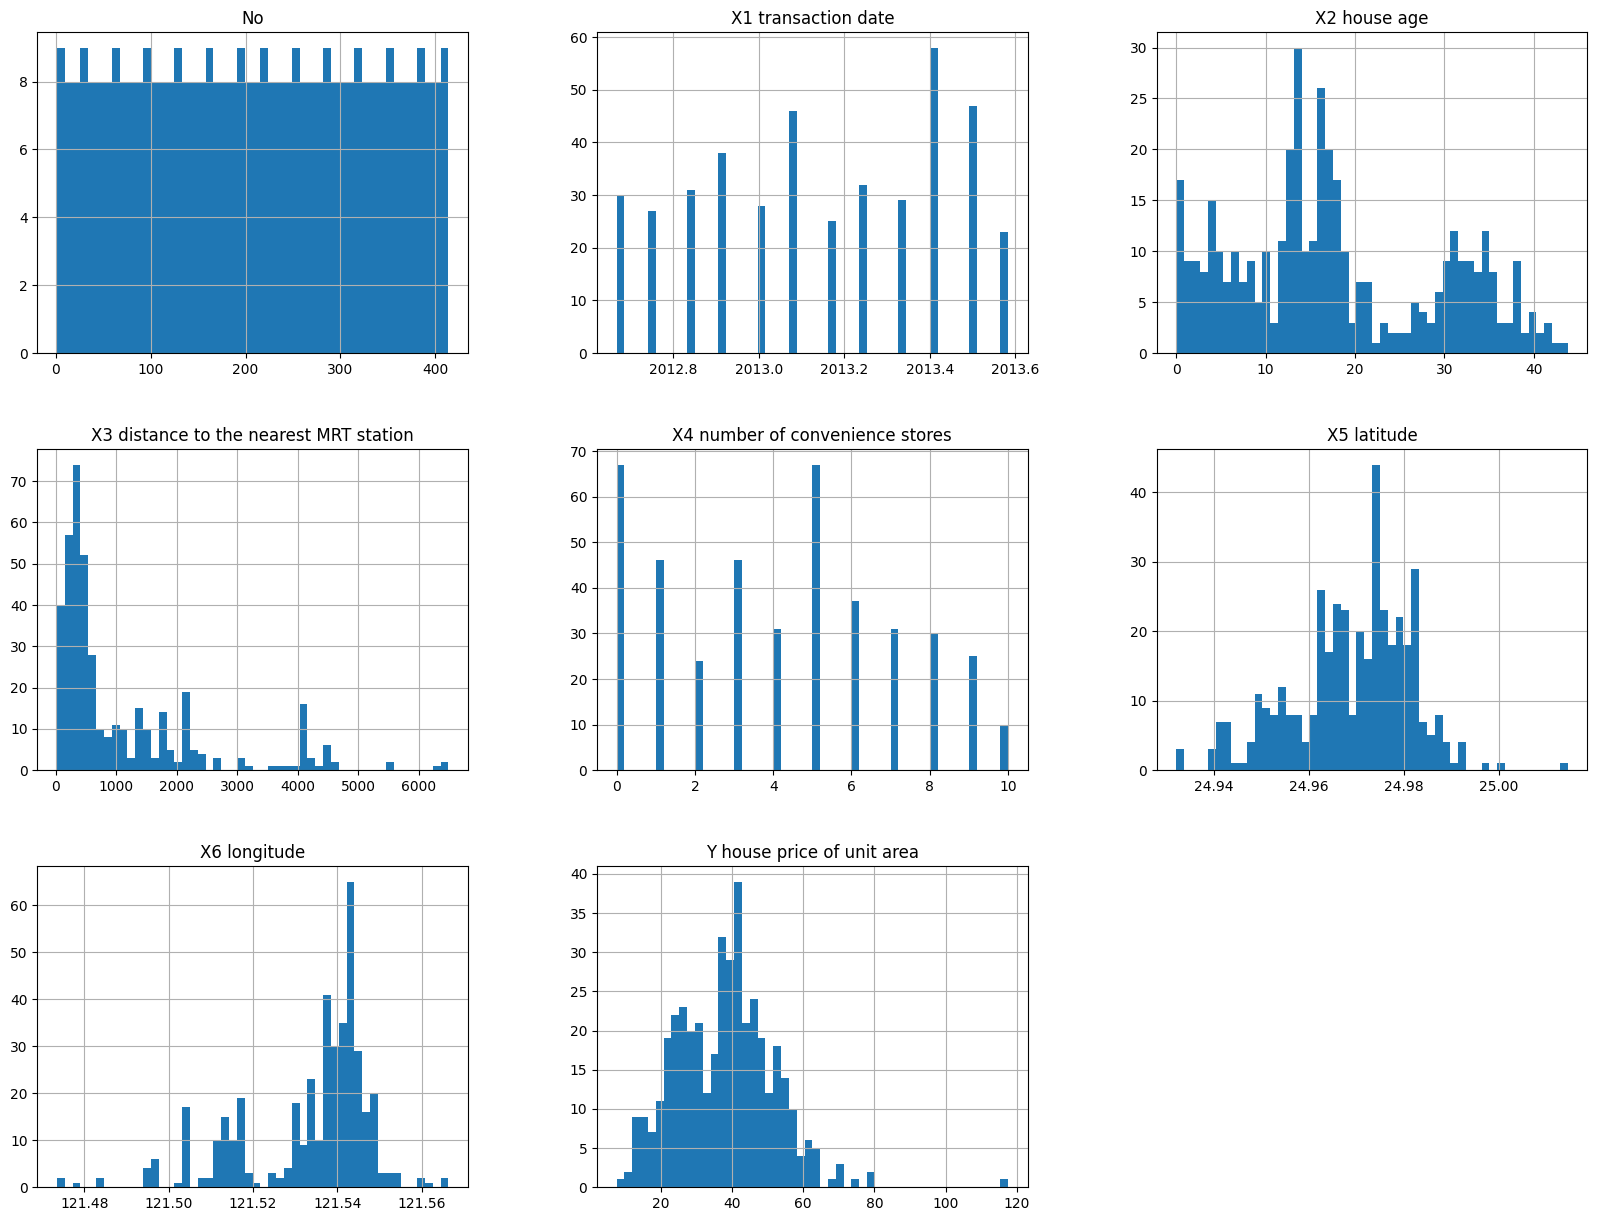

In [7]:
# For plotting histograms
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

# Train-Test Splitting

In [8]:
# For learning purpose(the below code can be used by using scikitlearn library)
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
# train_set, test_set = split_train_test(housing, 0.2)

In [10]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 331
Rows in test set: 83


In [12]:
#Suppose we have a label say CHAS. It consists of values either 0 or 1. It contains 93 '0' and 7 '1'.
# Now, there are chances that while splitting the data, training data got only '0' as value of CHAS.
# Then testing data will never show '1' as it doesn't about it.
# To make our model familiar with all the possible values we use the following function.....



from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['X4 number of convenience stores']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

    
strat_train_set['X4 number of convenience stores'].value_counts()
strat_test_set['X4 number of convenience stores'].value_counts()



#Before looking for correlations, make sure to create a copy of the data
housing=strat_train_set.copy()

# Looking for Correlations

In [13]:
corr_matrix=housing.corr()
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.636209
X5 latitude                               0.569626
X6 longitude                              0.535064
X1 transaction date                       0.054334
No                                       -0.022784
X2 house age                             -0.182001
X3 distance to the nearest MRT station   -0.692165
Name: Y house price of unit area, dtype: float64

array([[<Axes: xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X2 house age', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X4 number of convenience stores'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X2 house age'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X2 house age'>,
        <Axes: xlabel='X2 house age', ylabel='X2 house age'>,
        <Axes: xlabel='X3 distanc

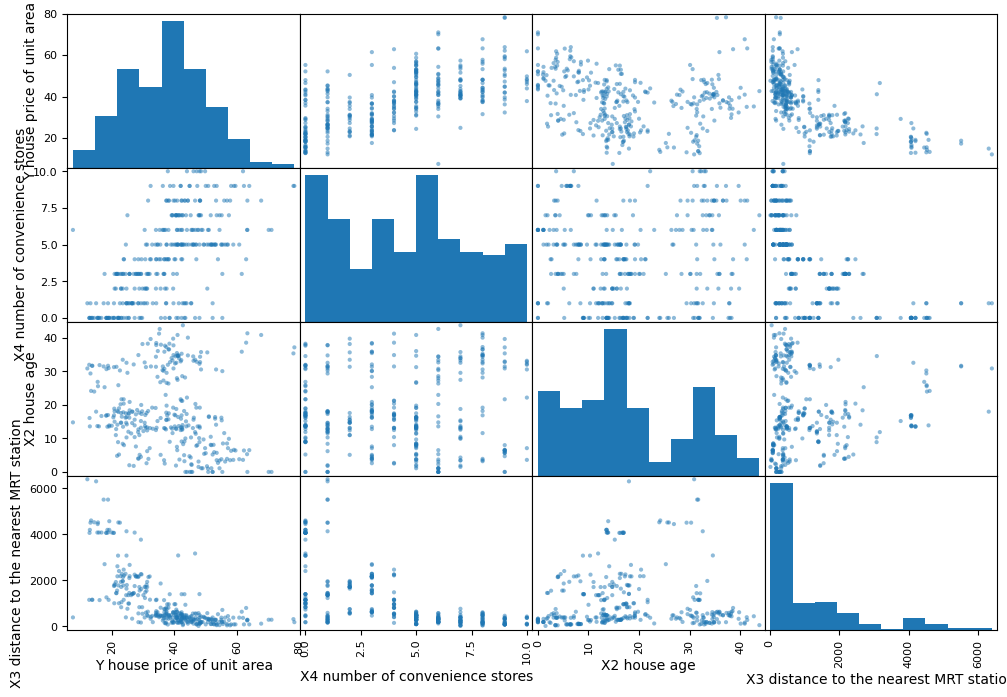

In [14]:
from pandas.plotting import scatter_matrix
attributes=["Y house price of unit area","X4 number of convenience stores","X2 house age","X3 distance to the nearest MRT station"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

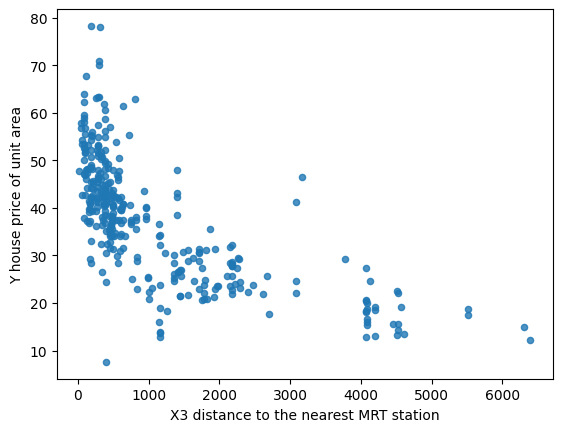

In [15]:
housing.plot(kind='scatter', x='X3 distance to the nearest MRT station', y='Y house price of unit area', alpha=0.8)

# Trying out Attribute Combinations

In [16]:
housing['Hage_price']=housing['X2 house age']/housing['Y house price of unit area']

In [17]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Hage_price
369,370,2012.667,20.2,2185.12800,3,24.96322,121.51237,22.8,0.885965
360,361,2012.667,32.9,87.30222,10,24.98300,121.54022,47.1,0.698514
180,181,2012.667,26.9,4449.27000,0,24.94898,121.49621,15.5,1.735484
188,189,2012.917,34.8,190.03920,8,24.97707,121.54312,44.3,0.785553
404,405,2013.333,16.4,289.32480,5,24.98203,121.54348,41.2,0.398058


In [18]:
corr_matrix=housing.corr()
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.636209
X5 latitude                               0.569626
X6 longitude                              0.535064
X1 transaction date                       0.054334
No                                       -0.022784
X2 house age                             -0.182001
Hage_price                               -0.631712
X3 distance to the nearest MRT station   -0.692165
Name: Y house price of unit area, dtype: float64

<Axes: xlabel='Hage_price', ylabel='Y house price of unit area'>

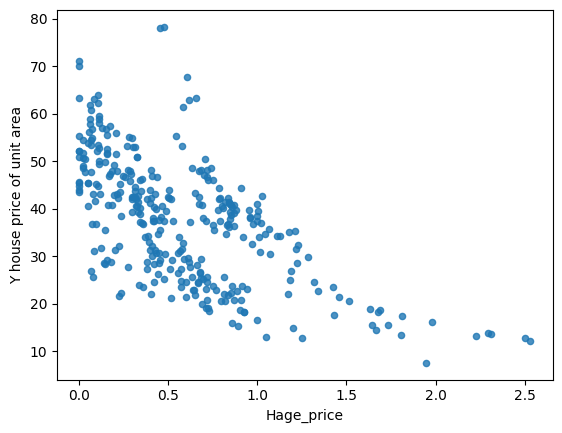

In [19]:
housing.plot(kind='scatter', x='Hage_price', y='Y house price of unit area', alpha=0.8)

In [20]:
housing=strat_train_set.drop("Y house price of unit area", axis=1)
housing_labels=strat_train_set['Y house price of unit area'].copy()

# Missing attributes

In [21]:
# In case, we have a dataset in which some values are missing, we can do one of the following:
#     1. Get rid of the missing data points.
#     2. Get rid of the whole attribute.
#     3. Set the value to some value(0, mean or median).

In [22]:
#a=housing.dropna(subset=['RM'])            #OPTION 1
#housing.drop("RM", axis=1)              #OPTION 2

#median= housing['RM'].median()           #OPTION 3
#housing['RM'].fillna(median)

In [23]:
#To deal with missing values which might be encountered in future

In [24]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([ 209.     , 2013.167  ,   16.1    ,  492.2313 ,    4.     ,
         24.9711 ,  121.53844])

In [26]:
X=imputer.transform(housing)
housing_tr=pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,209.368580,2013.142767,18.019033,1080.612966,4.102719,24.969250,121.533541
std,120.383667,0.280728,11.497031,1250.250085,2.944182,0.012326,0.015267
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.933630,121.475160
25%,103.500000,2012.917000,9.100000,289.324800,1.000000,24.963050,121.529675
50%,209.000000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538440
75%,311.500000,2013.417000,29.600000,1448.504000,6.000000,24.978045,121.543395
max,414.000000,2013.583000,43.800000,6396.283000,10.000000,25.014590,121.566270


# Scikit-learn DESIGN

Primarily, three types of objects:
1. Estimators - It estimates some parameter based on a dataset. E.g. imputer. It has a fit method and transform method. fit method: fits the dataset and calculate internal parameters.

2. Transformers - transform method takes input and return output based on the learnings from fit(). It also has a convenience function called fit_transform which fits and then transforms.

3. Predictors - LinearRegression model (EXAMPLE). fit() and predict() are two common functions. It also gives score() function which evaluates the predictions.

## Feature Scaling

primarily, two types of feature scaling methods:

1. Min-Max Scaling (NORMALIZATION) 
   (value-min)/(max-min)                #will get values b/w 0 and 1 
   Sklearn provides a class called MinMaxScaler for this.

2. Standardization 
    (value-mean)/(std. deviation)               #makes variance 1 
    Sklearn provides a class called StandardScaler for this.
    

# Creating a Pipeline

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    #.....we can add as many as we want in our pipeline
    ('std_scaler', StandardScaler())
    
])

In [28]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)
housing_num_tr

array([[ 1.33634919, -1.69732575,  0.18998546, ..., -0.37510886,
        -0.48993566, -1.38876478],
       [ 1.26147503, -1.69732575,  1.29629087, ...,  2.00606161,
         1.11723968,  0.43815207],
       [-0.23600818, -1.69732575,  0.7736269 , ..., -1.39561049,
        -1.64697191, -2.44883575],
       ...,
       [-0.41071455, -1.69732575, -0.21943465, ..., -0.03494165,
         0.78085414,  0.07211271],
       [-0.56046288,  0.67866516, -1.12538554, ..., -0.37510886,
         0.23402451, -1.13293083],
       [ 0.69575915, -0.21322332, -0.04521333, ...,  0.30522556,
        -1.01645216,  0.03012971]])

In [29]:
housing_num_tr.shape

(331, 7)

# Selecting a desired model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [31]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]


In [32]:
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([24.024, 45.106, 15.269, 43.997, 44.882])

In [33]:
list(some_labels)

[22.8, 47.1, 15.5, 44.3, 41.2]

# Evaluating the model

In [34]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels, housing_predictions)
rmse=np.sqrt(mse)

In [35]:
rmse

2.4465391463375217

linearRegression : mse- 60
DecisionTreeRegressor : mse- 0.0 (overfitting: Model has seen the data and didn't learn the trend)

## using better evaluation technique- CROSS VALIDATION

In [36]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores=np.sqrt(-scores)

In [37]:
rmse_scores

array([5.11902954, 8.07117076, 4.44026538, 7.64857364, 8.87450628,
       5.11333328, 6.46361307, 5.6002729 , 5.44472564, 9.29151152])

In [38]:
def print_scores(scores):
    print('scores: ', scores)
    print('mean: ', scores.mean())
    print('standard deviation: ', scores.std())
    

In [39]:
print_scores(rmse_scores)

scores:  [5.11902954 8.07117076 4.44026538 7.64857364 8.87450628 5.11333328
 6.46361307 5.6002729  5.44472564 9.29151152]
mean:  6.606700200237476
standard deviation:  1.6462573860204814


# Saving the model

In [40]:
from joblib import dump, load
dump(model, 'Rawat.joblib')

['Rawat.joblib']

# Testing the model on Test Data

In [41]:
X_test =strat_test_set.drop("Y house price of unit area", axis=1)
Y_test =strat_test_set['Y house price of unit area'].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_prediction= model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test, final_prediction)
final_rmse=np.sqrt(final_mse)

In [42]:
final_rmse

10.052752423548322

In [43]:
print(final_prediction, list(Y_test))

[50.453 45.456 19.463 25.48  51.978 24.552 41.684 27.406 38.748 45.977
 27.789 53.658 45.128 25.26  57.194 39.228 15.739 44.987 48.655 39.266
 48.129 37.461 34.788 28.726 24.852 38.164 51.081 23.301 34.001 40.801
 27.338 39.818 51.138 46.422 21.001 35.407 48.338 24.529 35.248 17.047
 41.191 51.693 32.889 40.05  27.418 55.482 41.876 33.303 25.311 53.339
 49.984 46.098 18.226 49.143 45.948 48.516 49.773 48.38  63.148 39.682
 37.826 16.598 28.648 39.788 24.583 29.503 40.631 63.437 15.959 40.221
 42.031 21.977 33.736 46.272 39.351 24.699 60.016 27.256 45.612 17.305
 52.003 53.404 49.734] [59.6, 40.3, 25.3, 24.7, 55.0, 45.1, 34.4, 23.6, 38.8, 117.5, 33.4, 56.3, 60.7, 27.7, 53.7, 30.0, 17.4, 46.6, 47.3, 42.3, 49.3, 42.9, 22.8, 30.7, 27.0, 26.9, 37.9, 25.9, 50.2, 44.2, 29.5, 36.6, 41.0, 33.6, 11.2, 26.5, 45.1, 21.8, 40.6, 14.7, 39.0, 45.5, 31.9, 40.2, 26.6, 58.0, 39.5, 37.4, 23.1, 54.4, 51.7, 36.3, 15.6, 51.4, 42.2, 38.4, 51.7, 49.7, 69.7, 37.8, 40.3, 11.6, 33.4, 46.4, 25.6, 31.3, 33.1, 73.6,

In [44]:
prepared_data[0]

array([ 1.33634919, -1.69732575,  0.18998546,  0.88477281, -0.37510886,
       -0.48993566, -1.38876478])

# USING THE MODEL

In [45]:
import numpy as np
from joblib import dump, load
model= load('Rawat.joblib')



In [46]:
features=np.array([[ 1.33634919, -1.69732575,  0.88998546,  0.88477281, -0.37510886,
       -0.57993566, -0.38876478]])
model.predict(features)

array([23.069])